# Lab Segmentation 2

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
import skimage.io as io
import numpy as np
from skimage.color import rgb2gray

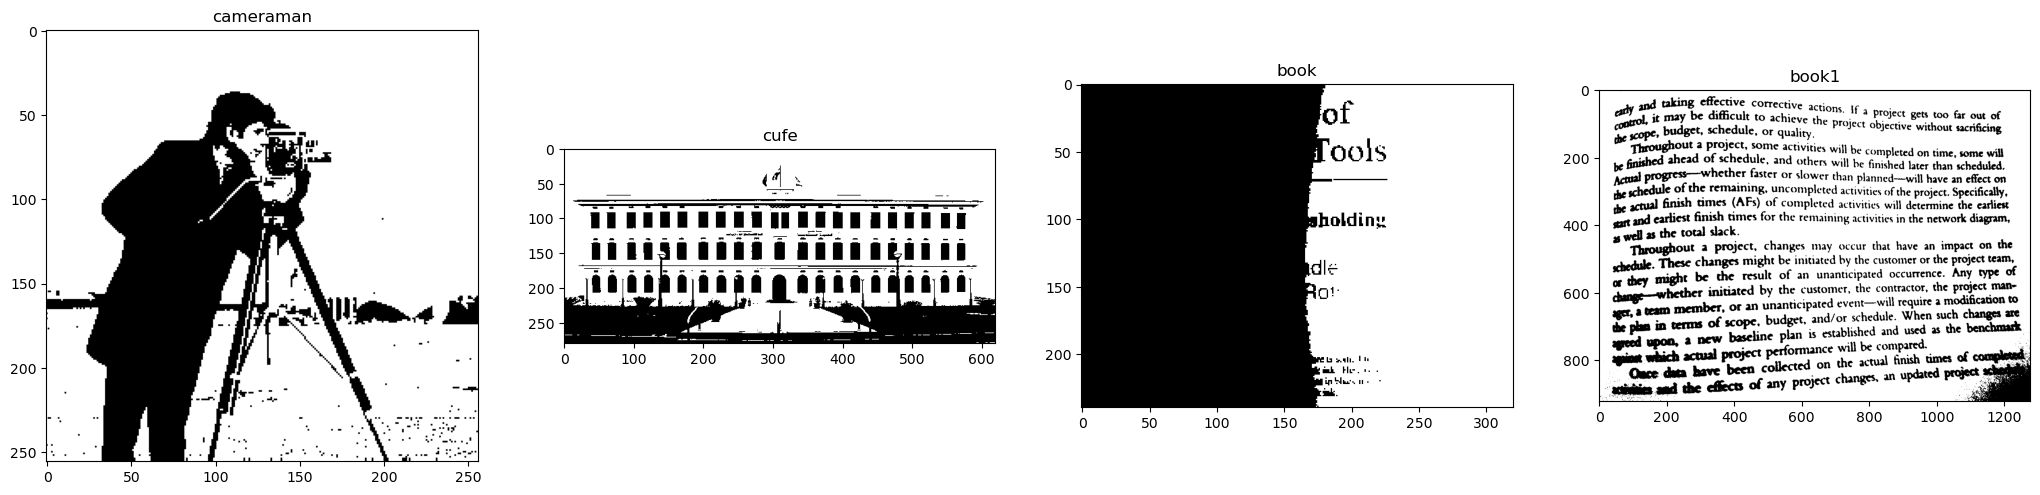

In [3]:
def getThreshold(img):
    if img.dtype != 'uint8':
        img = img*255
        img = img.astype(np.uint8)
    
    h,w = img.shape
    hist, bins = histogram(img)
    
    th = round(np.sum(np.multiply(hist,bins)) / (h*w))
    
    th_high = round(np.sum(np.multiply(hist[bins>th],bins[bins>th])) / np.sum(hist[bins>th]))
    th_low = round(np.sum(np.multiply(hist[bins<=th],bins[bins<=th])) / np.sum(hist[bins<=th]))
    new_th = round((th_high+th_low)/2)
    while new_th != th:
        th = new_th
        th_high = round(np.sum(np.multiply(hist[bins>th],bins[bins>th])) / np.sum(hist[bins>th]))
        th_low = round(np.sum(np.multiply(hist[bins<=th],bins[bins<=th])) / np.sum(hist[bins<=th]))
        new_th = round((th_high+th_low)/2)

    return th,img
    
camera = io.imread('imgs/cameraman.png')
th,camera = getThreshold(camera)
camera[camera > th] = 255
camera[camera <= th] = 0

cufe = io.imread('imgs/cufe.png')
cufe = rgb2gray(cufe)
th,cufe = getThreshold(cufe)
cufe[cufe > th] = 255
cufe[cufe <= th] = 0

book = io.imread('imgs/book.png')
th,book = getThreshold(book)
book[book > th] = 255
book[book <= th] = 0

book1 = io.imread('imgs/book1.png')
book1 = rgb2gray(book1)
th,book1 = getThreshold(book1)
book1[book1 > th] = 255
book1[book1 <= th] = 0

show_images([camera, cufe, book, book1], ['cameraman', 'cufe', 'book', 'book1'])

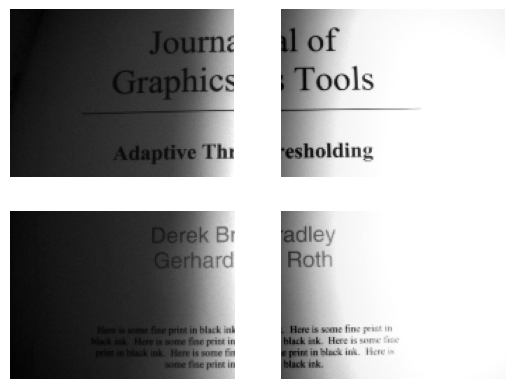

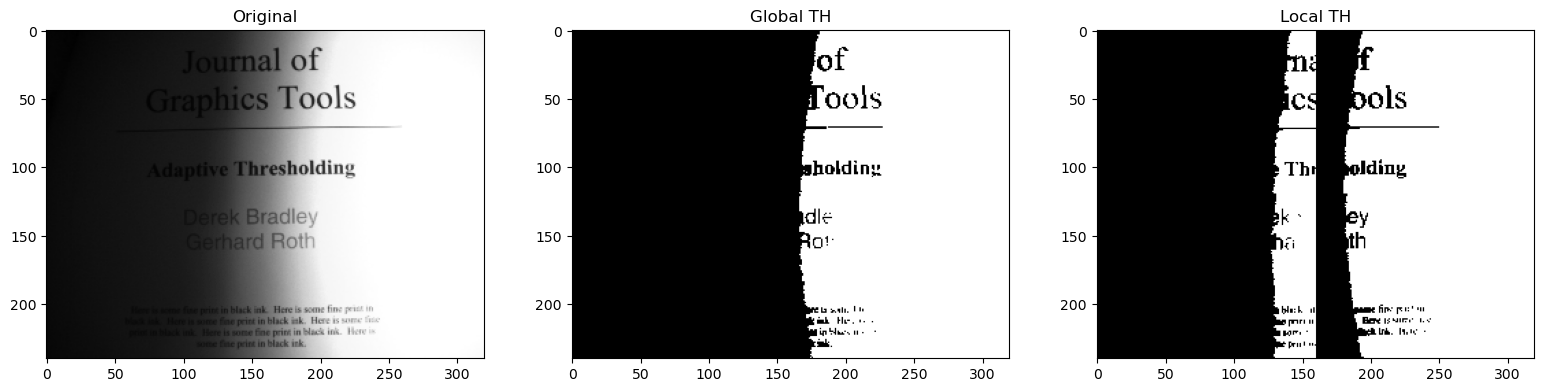

In [4]:
import cv2
img = io.imread('imgs/book.png')
th_global = img.copy()

th,th_global = getThreshold(th_global)
th_global[th_global > th] = 255
th_global[th_global <= th] = 0

img_copy = img.copy()
nrows, ncols = img.shape
rsplit, csplit = nrows // 2, ncols // 2

quadrants = [
    img_copy[:rsplit, :csplit],
    img_copy[:rsplit, csplit:],
    img_copy[rsplit:, :csplit],
    img_copy[rsplit:, csplit:],
]

fig, axes = plt.subplots(2, 2)
for quadrant, ax in zip(quadrants, axes.flat):
    ax.imshow(quadrant, cmap='gray')
    ax.set_axis_off()
    
for i,quadrant in enumerate(quadrants):
    th,temp = getThreshold(quadrant)
    quadrant[quadrant > th] = 255
    quadrant[quadrant <= th] = 0
half1 = np.concatenate((quadrants[0], quadrants[2]))
half2 = np.concatenate((quadrants[1], quadrants[3]))
th_local = np.concatenate([half1, half2] , axis = 1)

show_images([img, th_global, th_local], ['Original', 'Global TH', 'Local TH'])